In [2]:
from math import inf
import numpy as np
import matplotlib.pyplot as plt
import pygame
import random
from PIL import Image
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import imageio

pygame 2.5.2 (SDL 2.28.3, Python 3.11.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Task 1 Defina las variables crisp para encontrar la pelota

Las variables crisp son las siguientes:
* La distancia entre el robot y la pelota
* El ángulo entre el robot y la pelota


### Task 2 Defina las variables crisp para encontrar la pelota

Las variables lingüísticas (entrada) para el ángulo son las siguientes:
* Izquierda
* Derecha
* Centro

Las variables lingüísticas (entrada) para la distancia son las siguientes:
* Cerca
* Lejos


Las variables lingüísticas (salida) para la velocidad de movimiento del robot son las siguientes:
* Moverse
* Detenerse

### Task 3 Defina las cláusulas de Horn para encontrar la pelota

Las cláusulas de Horn para ubicar la pelota son las siguientes:

* Si la pelota está cerca y el ángulo es enfrente, entonces el robot se detiene.
* Si la pelota está lejos o el ángulo es a la derecha, entonces el robot avanza.
* Si la pelota está cerca y el ángulo es a la derecha, entonces el robot se detiene.
* Si la pelota está lejos o el ángulo es a la izquierda, entonces el robot avanza.
* Si la pelota está cerca y el ángulo es a la izquierda, entonces el robot se detiene.

### Task 4 Defina la defuzzificación para encontrar la pelota

Para la defuzzificación se usará el método del centroide. En este caso, el resultado que se obtendrá la velocidad que debe tener el robot para ir hacia la pelota, el cuál será un valor numérico. 

### Task 5 Defina las variables crisp para saber la fuerza con la que se debe patear la pelota

Variables para saber la fuerza con la que se debe patear:
- Distancia entre la pelota y el arco.

### Task 6 Defina las variables lingüísticas para saber la fuerza con la que se debe patear la pelota

Las variables lingüisticas de entrada (distancia entre pelota y portería) son:
- Cerca
- Lejos


Las variables lingüisticas de salida para la fuerza son:
- Fuerte
- Débil

### Task 7 Defina las cláusulas de Horn para saber la fuerza con la que se debe patear la pelota

Las cláusulas de Horn para la fuerza de pateo son las siguientes:

* Si la pelota está cerca y el ángulo es enfrente, entonces la fuerza es débil.
* Si la pelota está lejos y el ángulo es a la derecha, entonces la fuerza es fuerte.
* Si la pelota está cerca y el ángulo es a la derecha, entonces la fuerza es débil.
* Si la pelota está lejos y el ángulo es a la izquierda, entonces la fuerza es fuerte.
* Si la pelota está cerca y el ángulo es a la izquierda, entonces la fuerza es débil.
* Si la pelota está lejos y el ángulo es enfrente, entonces la fuerza es fuerte.

### Task 8 Defina la defuzzificación para saber la fuerza con la que se debe patear la pelota

En la defuzzificación se usa el método del centroide con scikit fuzz. Acá se devuelve el valor de la fuerza con la que se debe mover la pelota. Esto modificará su posición en el campo, dependiendo que tan lejos se encuentre del arco.

### Task 9 Grafique las funciones de pertenencia para encontrar la pelota

In [3]:
HEIGHT = 500
WIDTH = 700

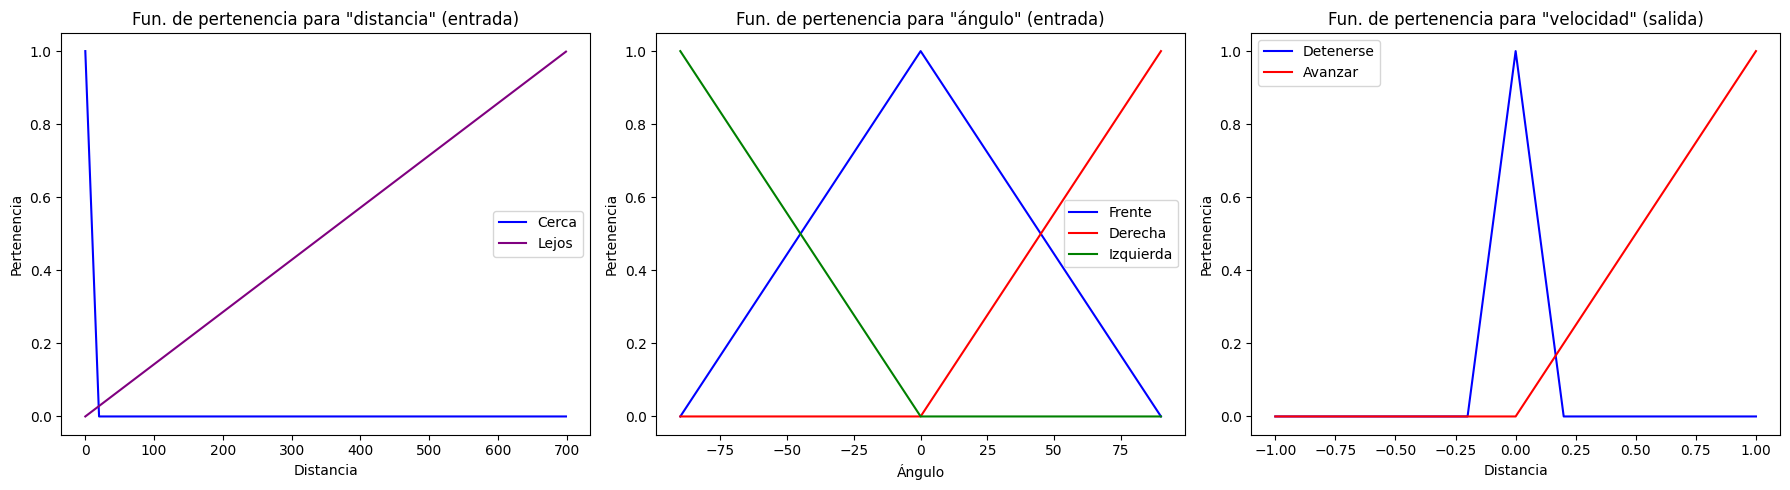

In [4]:
velocidad = np.arange(-1, 1.1, 0.1)
velocidad_detenerse = fuzz.trimf(velocidad, [-0.2, 0, 0.2])
velocidad_avanzar = fuzz.trimf(velocidad, [0, 1, 1])

distancia = np.arange(0, WIDTH, 1)
distancia_cerca = fuzz.trimf(distancia, [0, 0, 20])
distancia_lejos = fuzz.trimf(distancia, [0, WIDTH, WIDTH])

angulo = np.arange(-90, 91, 1)
angulo_frente = fuzz.trimf(angulo, [-90, 0, 90])
angulo_derecha = fuzz.trimf(angulo, [0, 90, 90])
angulo_izquierda = fuzz.trimf(angulo, [-90, -90, 0])

distancia_input = ctrl.Antecedent(np.arange(0, WIDTH, 1), 'distancia')
angulo_input = ctrl.Antecedent(np.arange(-90, 91, 1), 'angulo')
velocidad_output= ctrl.Consequent(np.arange(-1, 1.1, 0.1), 'velocidad')

distancia_input['cerca'] = distancia_cerca
distancia_input['lejos'] = distancia_lejos

angulo_input['enfrente'] = angulo_frente
angulo_input['derecha'] = angulo_derecha
angulo_input['izquierda'] = angulo_izquierda

velocidad_output['detenerse'] = velocidad_detenerse
velocidad_output['avanzar'] = velocidad_avanzar

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].plot(distancia, distancia_cerca, label='Cerca', color='blue')
axs[0].plot(distancia, distancia_lejos, label='Lejos', color='purple')
axs[0].set_xlabel('Distancia')
axs[0].set_ylabel('Pertenencia')
axs[0].legend()
axs[0].set_title('Fun. de pertenencia para "distancia" (entrada)')

axs[1].plot(angulo, angulo_frente, label='Frente', color='blue')
axs[1].plot(angulo, angulo_derecha, label='Derecha', color='red')
axs[1].plot(angulo, angulo_izquierda, label='Izquierda', color='green')
axs[1].set_xlabel('Ángulo')
axs[1].set_ylabel('Pertenencia')
axs[1].legend()
axs[1].set_title('Fun. de pertenencia para "ángulo" (entrada)')


axs[2].plot(velocidad, velocidad_detenerse, label='Detenerse', color='blue')
axs[2].plot(velocidad, velocidad_avanzar, label='Avanzar', color='red')
#axs[2].axvline(x=0,color = "blue",ymin=0.05,ymax=1.0)
axs[2].set_xlabel('Distancia')
axs[2].set_ylabel('Pertenencia')
axs[2].legend()
axs[2].set_title('Fun. de pertenencia para "velocidad" (salida)')

plt.tight_layout()
plt.show()


### Task 10 Grafique las funciones de pertenencia para saber la fuerza con la que se debe patear la pelota

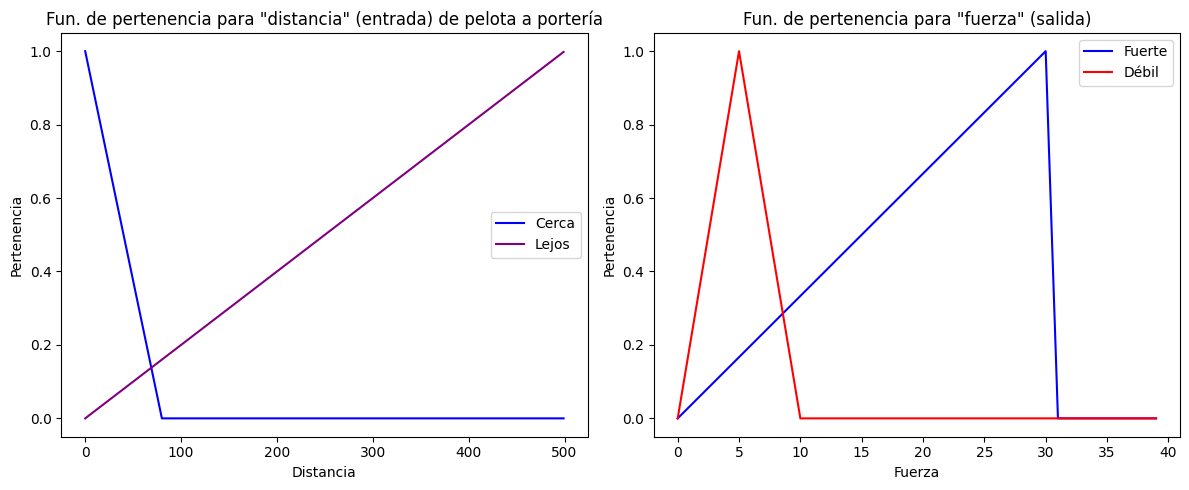

In [5]:
fuerza_output = ctrl.Consequent(np.arange(0, 40, 1), 'fuerza')
distancia_input_pelota = ctrl.Consequent(np.arange(0, WIDTH-200, 1), 'distancia_pelota')


distancia_pelota = np.arange(0, WIDTH-200, 1)
distancia_cerca_pelota = fuzz.trimf(distancia_pelota, [0, 0, 80])
distancia_lejos_pelota = fuzz.trimf(distancia_pelota, [0, WIDTH-200, WIDTH-200])

distancia_input_pelota['cerca'] = distancia_cerca_pelota
distancia_input_pelota['lejos'] = distancia_lejos_pelota

fuerza = np.arange(0, 40, 1)
fuerza_fuerte = fuzz.trimf(fuerza, [0, 30, 30])
fuerza_debil = fuzz.trimf(fuerza, [0, 5, 10])

fuerza_output['fuerte'] = fuerza_fuerte
fuerza_output['debil'] = fuerza_debil


fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(distancia_pelota, distancia_cerca_pelota, label='Cerca', color='blue')
axs[0].plot(distancia_pelota, distancia_lejos_pelota, label='Lejos', color='purple')
axs[0].set_xlabel('Distancia')
axs[0].set_ylabel('Pertenencia')
axs[0].legend()
axs[0].set_title('Fun. de pertenencia para "distancia" (entrada) de pelota a portería')

axs[1].plot(fuerza, fuerza_fuerte, label='Fuerte', color='blue')
axs[1].plot(fuerza, fuerza_debil, label='Débil', color='red')
axs[1].set_xlabel('Fuerza')
axs[1].set_ylabel('Pertenencia')
axs[1].legend()
axs[1].set_title('Fun. de pertenencia para "fuerza" (salida)')


plt.tight_layout()
plt.show()


### Task 11 Programe la interfaz gráfica donde se pueda seguir el movimiento del robot y la pelota

In [6]:
WHITE = (255, 255, 255)
RED = (255, 0, 0)
GREEN = (114, 173, 44)
BLACK = (0, 0, 0)

In [7]:
RED = (255, 0, 0)
BLUE = (0, 0, 255)
WHITE = (255, 255, 255)
GREEN = (114, 173, 44)

In [8]:
def obtener_distancia_actual(robot, balon):
    robot_x, robot_y = robot
    pelota_x, pelota_y = balon
    return np.sqrt((robot_x - pelota_x) ** 2 + (robot_y - pelota_y) ** 2)

In [9]:
import math

def obtener_angulo_actual(robot, pelota):
    robot_x, robot_y = robot
    pelota_x, pelota_y = pelota
    res = np.arctan2(pelota_y - robot_y, pelota_x - robot_x) * 180 / np.pi
    return res

In [10]:
def dibujar_robot(screen, x, y):
    # Dibuja el robot en la posición (x, y)
    pygame.draw.rect(screen, BLACK, (x, y, 8, 25)) 

def dibujar_pelota(screen, x, y):
    # Dibuja la pelota en la posición (x, y)
    pygame.draw.circle(screen, RED, (x, y), 5)
    
def dibujar_campo(screen):
    # Dibuja el campo de fútbol
    screen.fill(GREEN)

    # Semicirculo penal
    pygame.draw.circle(screen, WHITE, (WIDTH-200, HEIGHT//2), 120, 120)
    pygame.draw.circle(screen, GREEN, (WIDTH-200, HEIGHT//2), 118, 118)
    pygame.draw.rect(screen, GREEN, (WIDTH-200, HEIGHT//4-50, 200, HEIGHT//2+100), 100)
    

    # Dibujar portería
    pygame.draw.rect(screen, WHITE, (WIDTH-20, HEIGHT//3, 20, HEIGHT//3))

    # Dibujar rectangulo alrededor de portería
    pygame.draw.rect(screen, WHITE, (WIDTH-200, HEIGHT//4-50, 200, HEIGHT//2+100), 2)

    # Dibujar circulo encima del rectangulo,
    pygame.draw.circle(screen, WHITE, (WIDTH-125, HEIGHT//2), 8, 8)

    
    pygame.draw.circle(screen, WHITE, (0, HEIGHT//2), 120, 120)
    pygame.draw.circle(screen, GREEN, (0, HEIGHT//2), 118, 118)
    
    pygame.draw.circle(screen, WHITE, (0, HEIGHT//2), 8, 8)

In [11]:
# Reglas difusas
regla1 = ctrl.Rule(distancia_input['cerca'] & angulo_input['enfrente'], velocidad_output['detenerse'])
regla2 = ctrl.Rule(distancia_input['lejos'] | angulo_input['derecha'], velocidad_output['avanzar'])
regla3 = ctrl.Rule(distancia_input['cerca'] & angulo_input['derecha'], velocidad_output['detenerse'])
regla4 = ctrl.Rule(distancia_input['lejos'] | angulo_input['izquierda'], velocidad_output['avanzar'])
regla5 = ctrl.Rule(distancia_input['cerca'] & angulo_input['izquierda'], velocidad_output['detenerse'])

regla6 = ctrl.Rule(distancia_input['cerca'] & angulo_input['enfrente'], fuerza_output['debil'])
regla7 = ctrl.Rule(distancia_input['cerca'] & angulo_input['derecha'], fuerza_output['debil'])
regla8 = ctrl.Rule(distancia_input['cerca'] & angulo_input['izquierda'], fuerza_output['debil'])


regla9 = ctrl.Rule(distancia_input['lejos'] & angulo_input['enfrente'], fuerza_output['fuerte'])
regla10 = ctrl.Rule(distancia_input['lejos'] & angulo_input['derecha'], fuerza_output['fuerte'])
regla11 = ctrl.Rule(distancia_input['lejos'] & angulo_input['izquierda'], fuerza_output['fuerte'])


In [18]:

# robot = (0, 0)
# pelota = (100, 100)


# Crear el controlador difuso
controlador = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5,regla6,regla7,regla8,regla9,regla10,regla11])

# Crear una simulación del sistema de control
simulacion = ctrl.ControlSystemSimulation(controlador)

pygame.init()
screendow_size = (WIDTH, HEIGHT)
screen = pygame.display.set_mode(screendow_size)
pygame.display.set_caption("Simulación de Control Difuso")
velocidad_factor = 0.5

# Variables de posición iniciales
robot_x, robot_y = 0, 0
pelota_x, pelota_y = 150, 150

porteria_x = WIDTH
porteria_y = HEIGHT//2

umbral_llegada = 5
umbral_llegada_porteria = 8

seek = True
frame = 0

clock = pygame.time.Clock()
frame_rate = 30

frames_array = []
# Bucle principal
running = True
while running:
    try:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
        if seek:
            # Obtener la distancia y el ángulo actual (puedes usar valores fijos para este ejemplo)
            distancia_actual = obtener_distancia_actual((robot_x, robot_y), (pelota_x, pelota_y))
            angulo_actual = obtener_angulo_actual((robot_x, robot_y), (pelota_x, pelota_y))

            # Establecer los valores de las entradas en el sistema de control difuso
            simulacion.input['distancia'] = distancia_actual
            simulacion.input['angulo'] = angulo_actual

            # Computar la velocidad del robot
            simulacion.compute()

            # Obtener la velocidad calculada por el controlador
            velocidad_calculada = simulacion.output['velocidad']

            # Actualizar la posición del robot en función de la velocidad
            robot_x += velocidad_calculada * math.cos(angulo_actual * (math.pi / 180)) * velocidad_factor
            robot_y += velocidad_calculada * math.sin(angulo_actual * (math.pi / 180)) * velocidad_factor
            
            distancia_despues = obtener_distancia_actual((robot_x, robot_y), (pelota_x, pelota_y))

            # Limpiar la pantalla
            screen.fill((255, 255, 255))

            # Dibujar el robot y la pelota en sus nuevas posiciones
            dibujar_campo(screen)
            dibujar_robot(screen, robot_x, robot_y)
            dibujar_pelota(screen, pelota_x, pelota_y)

            if distancia_despues <= umbral_llegada:
                seek = False
        
        else:
            # Obtener la distancia y el ángulo actual (puedes usar valores fijos para este ejemplo)
            distancia_actual = obtener_distancia_actual((porteria_x, porteria_y), (pelota_x, pelota_y))
            angulo_actual = obtener_angulo_actual((pelota_x, pelota_y), (porteria_x, porteria_y))

            # Establecer los valores de las entradas en el sistema de control difuso
            simulacion.input['distancia'] = distancia_actual
            simulacion.input['angulo'] = angulo_actual

            # Computar la velocidad del robot
            simulacion.compute()

            # Obtener la velocidad calculada por el controlador
            fuerza_calculada = simulacion.output['fuerza']
            # print(fuerza_calculada)
            # print("->",angulo_actual)
            # Actualizar la posición del balon en función de la fuerza
            pelota_x += fuerza_calculada * math.cos(angulo_actual * (math.pi / 180)) * 5
            pelota_y += fuerza_calculada * math.sin(angulo_actual * (math.pi / 180)) * 5
            
            distancia_despues_pelota = obtener_distancia_actual((porteria_x, porteria_y), (pelota_x, pelota_y))
            if distancia_despues_pelota <= umbral_llegada_porteria or pelota_x >= WIDTH:
                print("Gol!!!! SIUUUUU")
                running = False
            seek = True
            # Limpiar la pantalla
            screen.fill((255, 255, 255))

            # Dibujar el robot y la pelota en sus nuevas posiciones
            dibujar_campo(screen)
            dibujar_pelota(screen, pelota_x, pelota_y)
            # logica de patear pelota
        
        # frame += 1
        # if frame % 5 == 0:
        #     pygame.image.save(screen, f"frames_simulation/frame{frame}.png")

        pygame.display.flip()

        clock.tick(frame_rate)

    except Exception as e:
        running = False
        print(e)
# Salir de Pygame
pygame.quit()

Gol!!!! SIUUUUU


In [19]:
from PIL import Image
import os



# Obtener una lista de nombres de archivos de cuadros
frames = [f'frames_simulation/frame{i:d}.png' for i in range(frame)]

# Abrir cada imagen y agregarla a una lista
images = [Image.open(frame) for frame in frames]

# Guardar las imágenes como un archivo GIF
images[0].save('simulacion.gif', save_all=True, append_images=images[1:], duration=20, loop=0)

# Eliminar los archivos de cuadros individuales



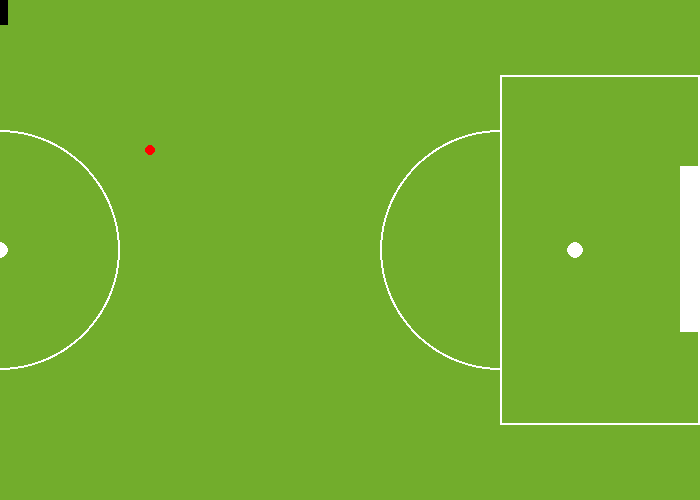

In [20]:
Image.open('simulacion.gif')